<a href="https://colab.research.google.com/github/thiagot3/Regress-o-Linear/blob/main/Regress%C3%A3o%20L.%20Simples%20com%20Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regressão Linear Simples utilizando Sklearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_excel("/content/Cópia de imoveis.xlsx")
df.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [ ]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


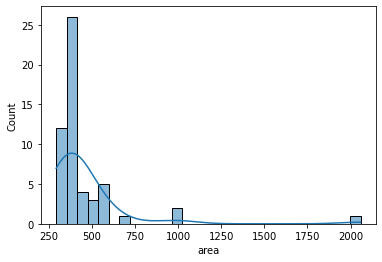

In [ ]:
sns.histplot(df, x= "area", kde=True);

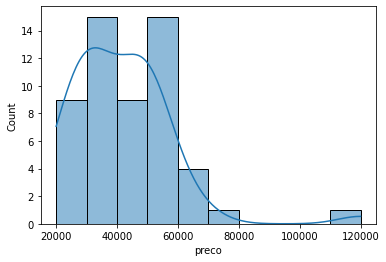

In [ ]:
sns.histplot(df, x= "preco", kde=True);

In [ ]:
df.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


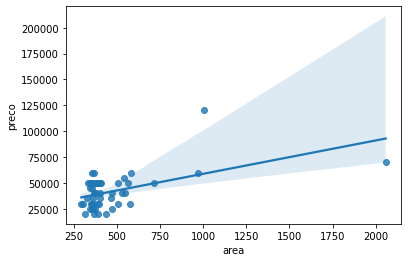

In [ ]:
sns.regplot(x = "area", y = "preco", data = df);

In [ ]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [ ]:
# Normalizando os valores
scaler = MinMaxScaler()
imovel_norm = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns = df.columns)

In [ ]:
imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [ ]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


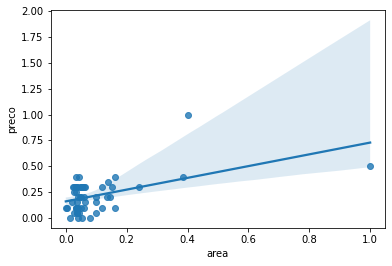

In [ ]:
sns.regplot(x = "area", y = "preco", data = imovel_norm);

In [ ]:
function = "preco ~ area"
model = smf.ols(formula=function, data= imovel_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           7.76e-05
Time:                        01:10:06   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [ ]:
x = imovel_norm[["area"]]
y = imovel_norm[["preco"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state= 42)
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
r_sq= lr.score(x_train, y_train)
print(r_sq)

0.2754399686961232


In [ ]:
y_pred_train = lr.predict(x_train)
print("MAE:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.1068423059800295
MSE: 0.019987119738590717
RMSE: 0.1413758103021543


In [ ]:
lr.fit(x_test,y_test)

LinearRegression()

In [ ]:
y_pred_test = lr.predict(x_test)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RMSE: 0.13216900408268478


### Exercício

</br>

O Ministério da Educação solicitou a você uma previsão do percentual de alunos que serão aprovados no ano de 2017, tendo como base o ano de 2016.

Crie um modelo que consiga prever o valor de aprovação em 2016 com as aprovações de 2015.

Faça todo tratamento de dados aprendido e faça a regressão linear com Sklearn, normalize a base, e analise as métricas do modelo

In [ ]:
df_alunos = pd.read_excel("/content/C+¦pia de aprovacao_alunos.xlsx")
df_alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [ ]:
df_alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


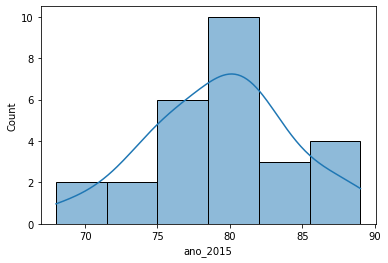

In [ ]:
sns.histplot(df_alunos, x= "ano_2015", kde= True);

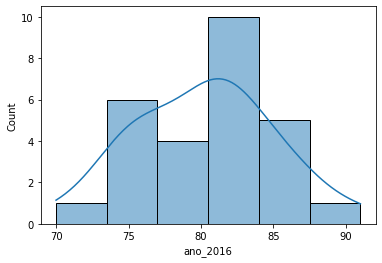

In [ ]:
sns.histplot(df_alunos, x= "ano_2016", kde= True);

In [ ]:
df_alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
# Normalizando os valores
scaler = MinMaxScaler()
alunos_norm = pd.DataFrame(scaler.fit_transform(df_alunos), index = df_alunos.index, columns = df_alunos.columns)
alunos_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [ ]:
alunos_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


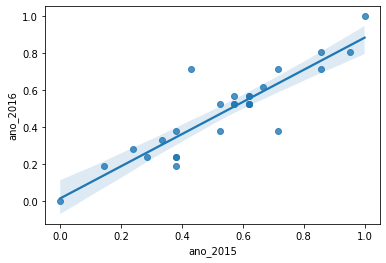

In [ ]:
sns.regplot (x = "ano_2015", y= "ano_2016", data= alunos_norm);

In [ ]:
function = "ano_2016 ~ ano_2015"
model = smf.ols(formula=function, data= alunos_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):           3.02e-10
Time:                        01:10:07   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [ ]:
function = "ano_2016 ~ ano_2015 - 1"
model = smf.ols(formula=function, data= alunos_norm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Tue, 07 Mar 2023   Prob (F-statistic):                    2.21e-20
Time:                        01:10:07   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x = alunos_norm[["ano_2015"]]
y = alunos_norm[["ano_2016"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state = 42)#random_state, para a correção


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Pontuação de acertos
lr_score= lr.score(x_train, y_train)
print(lr_score)

0.8800910056640281


In [ ]:
y_pred_train = lr.predict(x_train)
print("MAE de treino:", metrics.mean_absolute_error(y_train, y_pred_train))
print("MSE de treino:", metrics.mean_squared_error(y_train, y_pred_train))
print("RMSE de treino:", np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE de treino: 0.06313092719197842
MSE de treino: 0.006947385853516443
RMSE de treino: 0.08335097991935334


In [ ]:
y_pred_test = lr.predict(x_test)
print("MAE de teste:", metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE de teste:", metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE de teste:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE de teste: 0.10156392395533688
MSE de teste: 0.02234792217796548
RMSE de teste: 0.14949221443929941
